In [1]:
def stacked_plot(X, Y="Y", a=8, b=3, rows=1, columns=2):
    rcParams['figure.figsize'] = (a, b)
    
    fig, (ax1, ax2) = plt.subplots(rows,columns)
    
    var = train.groupby([X, Y]).XX.sum()
    b=var.unstack().plot(kind='bar',stacked=True,ax=ax1)
    b.set_title(X+" Train (Bar Chart)",weight="bold").set_fontsize('12')
    
    var2 = pd.crosstab(train[X], train[Y]).apply(lambda r: r/r.sum(), axis=1)
    k=var2.plot(kind='bar', stacked=True, ax=ax2 )
    k.set_title(X+" (Stacked Chart)",weight="bold").set_fontsize('12')

In [2]:
def cate_plot(X,a=8,b=3,order=None, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.countplot(X,data=train,ax=ax1, order=order)
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.1f}%'.format(100.*y/len(train)), (x.mean(), y), ha='center', va='bottom')
    ax1.set_title('Train')
    sns.countplot(X,data=test,ax=ax2, order=order)
    for p in ax2.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax2.annotate('{:.1f}%'.format(100.*y/len(test)), (x.mean(), y), ha='center', va='bottom')
    ax2.set_title('Test')
    sns.countplot(X,data=data,ax=ax3, order=order)
    ax3.set_title('Data')
    for p in ax3.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax3.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')

In [3]:
def cont_plot(X,a=8,b=3, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.distplot(train[X],ax=ax1)
    ax1.set_title('Train')
    sns.distplot(test[X],ax=ax2)
    ax2.set_title('Test')
    sns.distplot(data[X],ax=ax3)
    ax3.set_title('Data')

In [4]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

In [5]:
random.seed(3)

In [6]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [7]:
train=pd.read_csv(r"C:\Users\HARSH\Desktop\AMEX\Data\Training_Dataset.csv")
test=pd.read_csv(r"C:\Users\HARSH\Desktop\AMEX\Data\Leaderboard_Dataset.csv")

In [8]:
data=pd.concat([train, test])

In [9]:
data.shape, train.shape, test.shape

((50000, 52), (40000, 52), (10000, 46))

In [10]:
data.head()

,cm_key,mvar1,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,...,mvar47,mvar48,mvar49,mvar5,mvar50,mvar51,mvar6,mvar7,mvar8,mvar9
0,1,Charge,1,6.0899,Office supplies,12,1,0,0.00,0.00,...,0.0,1.0,0.0,18,0.0,0.0,970,0.7969,0.1831,337236
1,2,Charge,1,4.2016,Unknown,11,1,0,52.45,17.20,...,0.0,0.0,0.0,19,0.0,0.0,1030,0.0678,0.0000,2918974
2,3,Charge,0,3.3760,Misc services,12,1,1,1079.04,175.88,...,0.0,1.0,0.0,35,0.0,0.0,327,0.7551,0.2986,498656
3,4,Charge,1,4.1082,Social services,12,1,0,534.69,2344.77,...,0.0,1.0,0.0,274,0.0,1.0,1258,0.7969,0.5297,2480074
4,5,Charge,0,0.0000,Unknown,6,2,0,0.00,0.00,...,0.0,0.0,1.0,1,0.0,0.0,0,2.3238,0.0000,2918974


In [11]:
data["XX"] = 1
train["XX"] = 1

In [12]:
data["Y"] = "None"
data["Y"][data.mvar49 == 1] = "Supp"
data["Y"][data.mvar50 == 1] = "Elite"
data["Y"][data.mvar51 == 1] = "Credit"

train["Y"] = "None"
train["Y"][train.mvar49 == 1] = "Supp"
train["Y"][train.mvar50 == 1] = "Elite"
train["Y"][train.mvar51 == 1] = "Credit"

In [13]:
del data["mvar46"]
del data["mvar47"]
del data["mvar48"]
del data["mvar49"]
del data["mvar50"]
del data["mvar51"]

In [14]:
len(data.columns)

48

In [15]:
data.columns

Index(['cm_key', 'mvar1', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14',
       'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar2', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar3', 'mvar30', 'mvar31', 'mvar32', 'mvar33',
       'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar4',
       'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar5',
       'mvar6', 'mvar7', 'mvar8', 'mvar9', 'XX', 'Y'],
      dtype='object')

In [16]:
unique_values = pd.DataFrame(test.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: data[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: data[x].nunique())
unique_values

,Column,Type,UniqueValues
0,cm_key,int64,50000
1,mvar1,object,1
2,mvar2,int64,12
3,mvar3,int64,1881
4,mvar4,int64,13
5,mvar5,int64,355
6,mvar6,int64,2925
7,mvar7,float64,13849
8,mvar8,float64,162
9,mvar9,int64,16523


In [17]:
train.Y.value_counts()

None      31122
Supp       3447
Credit     2777
Elite      2654
Name: Y, dtype: int64

## mvar1 : Card product type

In [18]:
# mvar1
print ("Data: " + str(data["mvar1"].nunique()) + "  Train: "+ str(train["mvar1"].nunique())+
       "  Test: "+ str(test["mvar1"].nunique()))

Data: 1  Train: 1  Test: 1


In [19]:
# remove mvar1

## mvar2 : Family Size

In [20]:
# mvar2
print ("Data: " + str(data["mvar2"].nunique()) + "  Train: "+ str(train["mvar2"].nunique())+
       "  Test: "+ str(test["mvar2"].nunique()))

Data: 12  Train: 12  Test: 12


In [21]:
data["mvar2"].value_counts()

0     25978
1     11132
2      4397
4      3537
3      2452
5      1646
6       315
7       174
11      135
8       106
9        74
10       54
Name: mvar2, dtype: int64

In [22]:
pd.crosstab(train["mvar2"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar2,,,,
0,2009,1459,16028,1312
1,441,636,7378,493
2,139,261,2848,301
3,71,130,1443,264
4,75,115,2115,517
5,38,46,909,302
6,1,3,162,84
7,0,1,85,54
8,0,2,45,36


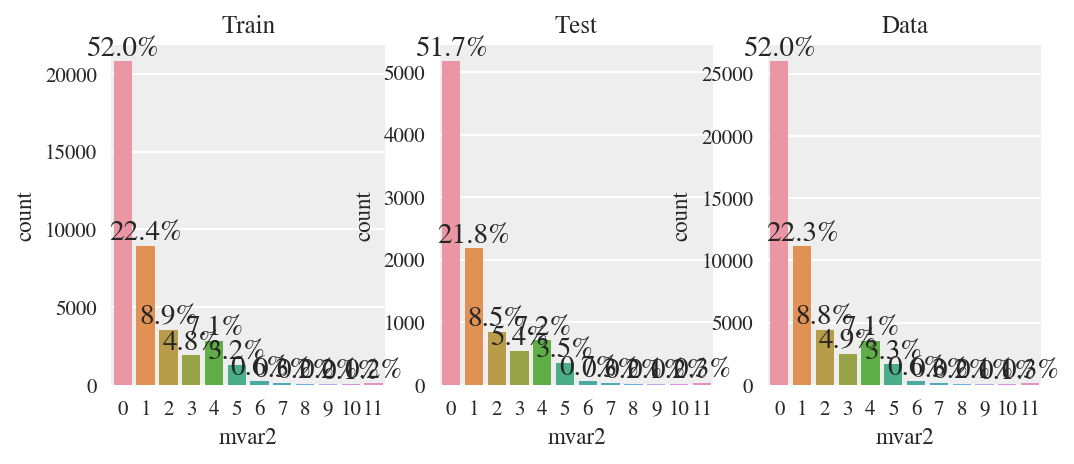

In [23]:
cate_plot("mvar2")

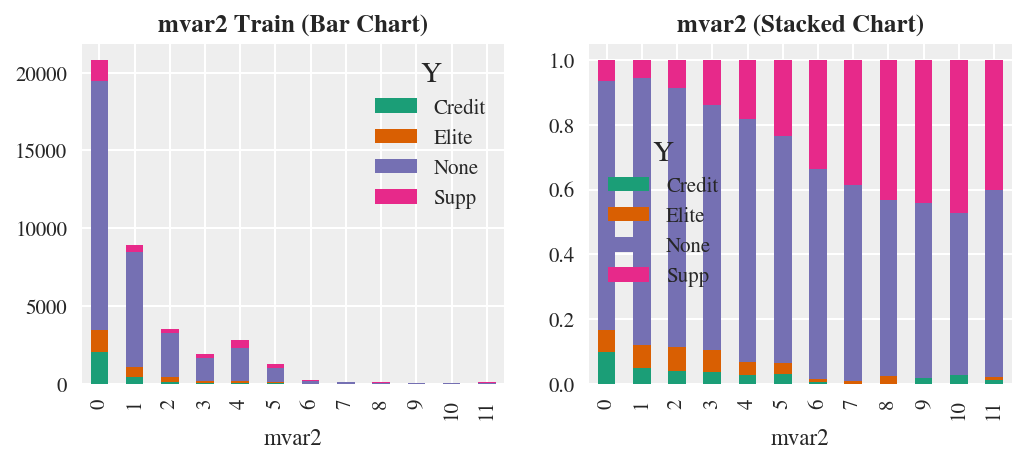

In [24]:
stacked_plot("mvar2")

In [25]:
# Keeping both as numerical as well as categorical

## mvar3 : Customer Spending Capacity

In [27]:
# mvar3
print ("Data: " + str(data["mvar3"].nunique()) + "  Train: "+ str(train["mvar3"].nunique())+
       "  Test: "+ str(test["mvar3"].nunique()))

Data: 1881  Train: 1703  Test: 932


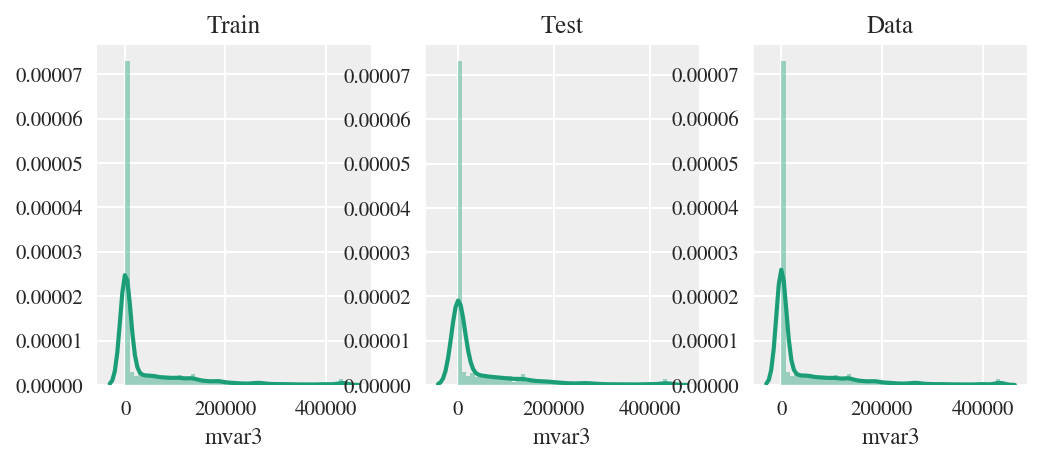

In [28]:
cont_plot("mvar3")

In [29]:
# Replacing 0 with mean # See later
data["mvar3"][data.mvar3==0] = data["mvar3"][data.mvar3 >0].mean()
train["mvar3"][train.mvar3==0] = data["mvar3"][data.mvar3 >0].mean()
test["mvar3"][test.mvar3==0] = data["mvar3"][data.mvar3 >0].mean()

In [30]:
data["mvar3"].describe()

count     50000.000000
mean     116417.815620
std       64877.054939
min         445.000000
25%      116417.815620
50%      116417.815620
75%      116417.815620
max      434629.000000
Name: mvar3, dtype: float64

In [32]:
# Fill the missing values with wiseness

## mvar4 : Number of total cards (including estimated external) active in the last year

In [33]:
print ("Data: " + str(data["mvar4"].nunique()) + "  Train: "+ str(train["mvar4"].nunique())+
       "  Test: "+ str(test["mvar4"].nunique()))

Data: 13  Train: 13  Test: 13


In [34]:
data["mvar4"].value_counts()

4     10581
2      9526
3      8427
1      8278
0      3658
5      2984
6      2045
8      1508
7      1356
12      637
9       443
10      337
11      220
Name: mvar4, dtype: int64

In [35]:
pd.crosstab(train["mvar4"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar4,,,,
0,129,156,2391,272
1,361,382,5192,599
2,486,519,5960,653
3,503,426,5268,578
4,629,630,6488,733
5,224,178,1820,190
6,138,114,1246,139
7,81,81,842,85
8,113,88,943,88


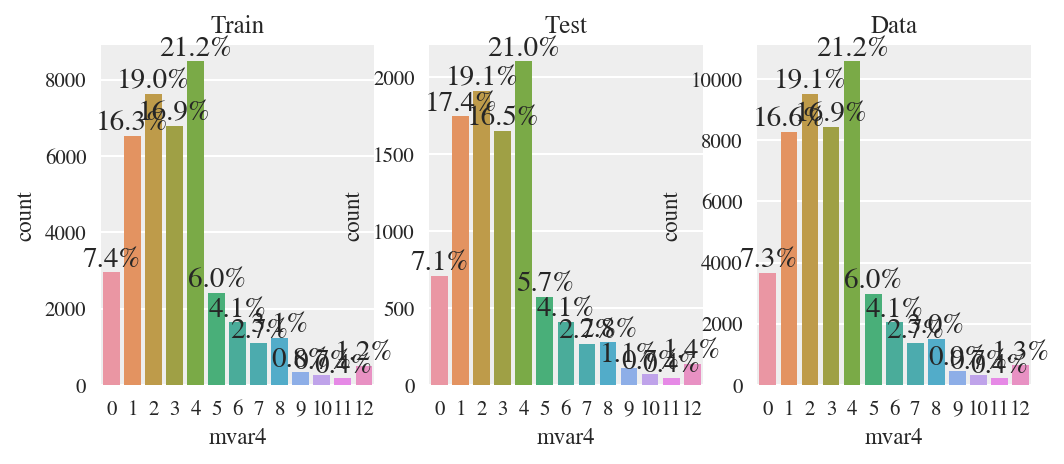

In [36]:
cate_plot("mvar4")

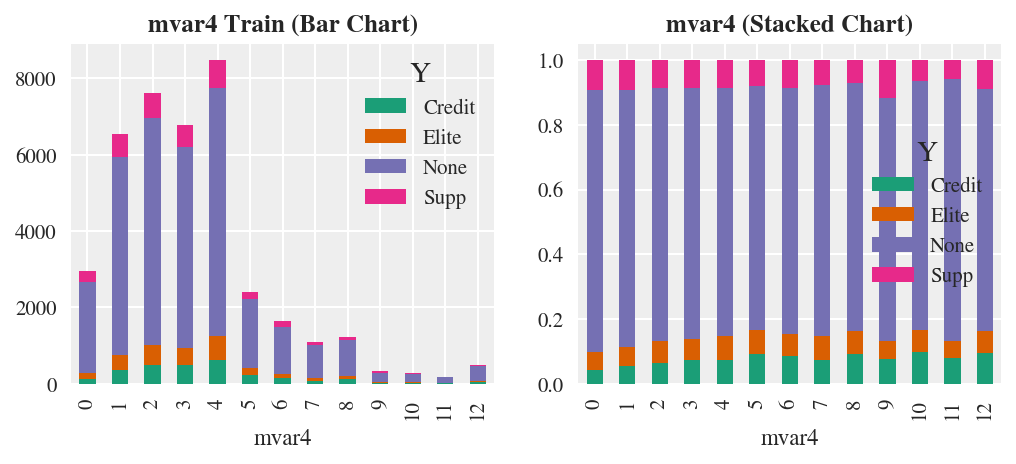

In [37]:
stacked_plot("mvar4")

## mvar5 : Number of months the Account has been set up.

In [38]:
data["mvar5"].nunique()

355

In [39]:
print ("Data: " + str(data["mvar5"].nunique()) + "  Train: "+ str(train["mvar5"].nunique())+
       "  Test: "+ str(test["mvar5"].nunique()))

Data: 355  Train: 355  Test: 353


In [40]:
pd.crosstab(train["mvar5"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar5,,,,
1,0,3,607,150
2,1,2,494,97
3,8,2,351,81
4,58,19,455,74
5,58,73,535,57
6,67,90,503,64
7,164,143,950,111
8,78,62,376,39
9,57,39,427,38


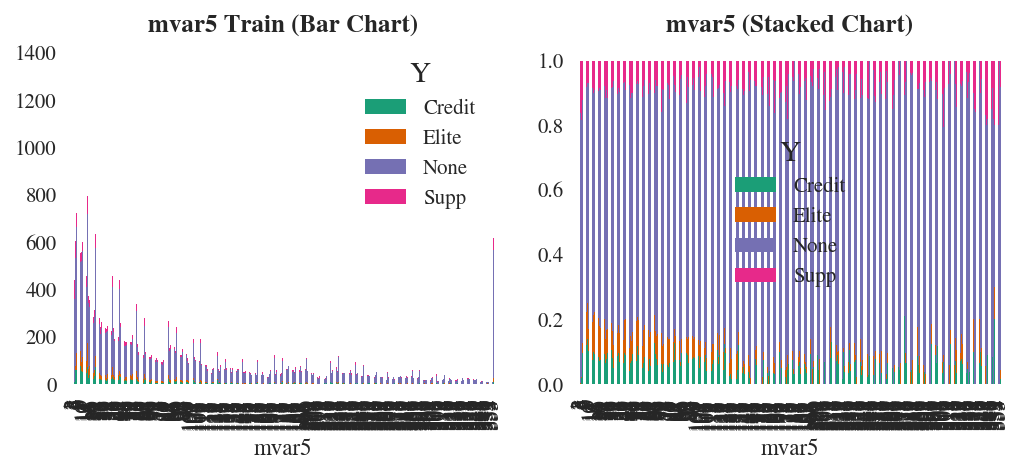

In [41]:
stacked_plot("mvar5")

## mvar6 : Total club memberhship fees in the last one year

In [42]:
data["mvar6"].nunique()

2925

In [43]:
data["mvar6"].value_counts()

0       4933
381     3514
981     3239
490     2218
190     1313
327     1204
272     1142
4830     789
207      736
245      675
1079     647
763      537
1962     533
1635     523
185      431
163      415
545      365
479      323
1362     312
1308     287
654      271
1177     237
817      230
1471     223
436      220
1188     191
1406     187
588      186
103      172
577      167
        ... 
3730       1
3654       1
1127       1
211        1
3622       1
2322       1
4433       1
2450       1
3462       1
1383       1
3430       1
2578       1
627        1
2706       1
2738       1
3174       1
2726       1
3142       1
1063       1
3110       1
2930       1
883        1
3046       1
2994       1
3410       1
2822       1
3474       1
3602       1
3666       1
2047       1
Name: mvar6, dtype: int64

In [44]:
data.mvar6.quantile(0.99)

4830.0

In [45]:
data["mvar6"].describe()

count    50000.000000
mean       907.986640
std        922.887858
min          0.000000
25%        327.000000
50%        588.000000
75%       1193.000000
max       4830.000000
Name: mvar6, dtype: float64

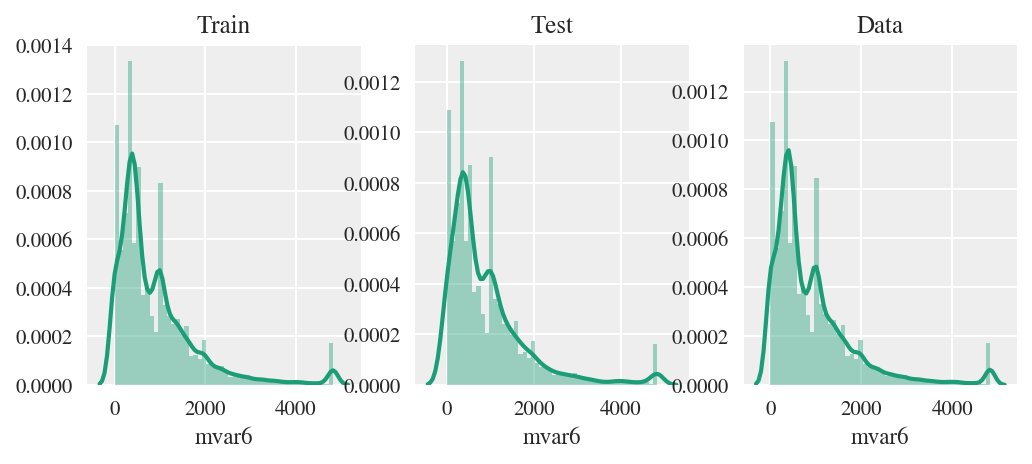

In [46]:
cont_plot("mvar6")

In [48]:
data["mvar6"].skew()

2.0742021645467372

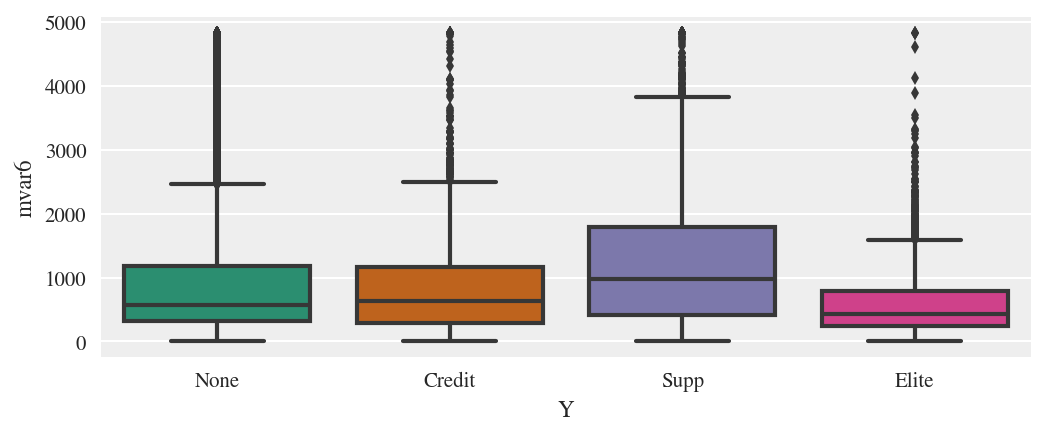

In [49]:
sns.boxplot(x="Y", y="mvar6", data=data)

## mvar7 : Internal score for affinity towards high spend

In [50]:
data["mvar7"].nunique()

13849

In [51]:
data["mvar7"].describe()

count    50000.000000
mean         0.730427
std          1.270150
min          0.000100
25%          0.107000
50%          0.383700
75%          0.796900
max         10.000000
Name: mvar7, dtype: float64

In [52]:
data.mvar7.quantile(0.99)

7.7211580000000115

In [53]:
train["Y"][train.mvar7>1].value_counts()

None      4053
Supp       998
Elite      299
Credit     155
Name: Y, dtype: int64

In [54]:
pd.crosstab(train["mvar7"][train.mvar7>1], train["Y"][train.mvar7>1])

Y,Credit,Elite,None,Supp
mvar7,,,,
1.0002,0,0,1,1
1.0003,0,0,1,0
1.0005,0,0,1,0
1.0006,0,0,1,0
1.0007,0,0,0,1
1.0011,0,0,1,0
1.0013,0,0,0,1
1.0025,0,0,1,0
1.0028,0,0,2,0


In [55]:
data["mvar7"].value_counts()

0.7969     10327
10.0000      318
0.0001       220
0.0031        26
0.0020        26
0.0266        24
0.0014        24
0.0241        24
0.0002        24
0.0013        24
0.0160        23
0.0057        23
0.0185        23
0.0077        23
0.0009        23
0.0008        22
0.0601        21
0.0133        21
0.0138        21
0.0146        21
0.0038        21
0.0074        21
0.0012        21
0.0384        21
0.0132        21
0.0411        21
0.0306        21
0.0295        21
0.0006        21
0.0531        21
           ...  
3.5965         1
0.4250         1
1.7778         1
1.2190         1
4.4759         1
0.3558         1
1.1249         1
0.6532         1
0.9087         1
2.1065         1
7.1878         1
1.3376         1
0.5652         1
3.4030         1
1.0254         1
0.4138         1
2.9865         1
2.1419         1
0.9180         1
2.7578         1
1.0714         1
2.6736         1
2.3266         1
0.7496         1
1.6138         1
0.4794         1
0.7157         1
1.7703        

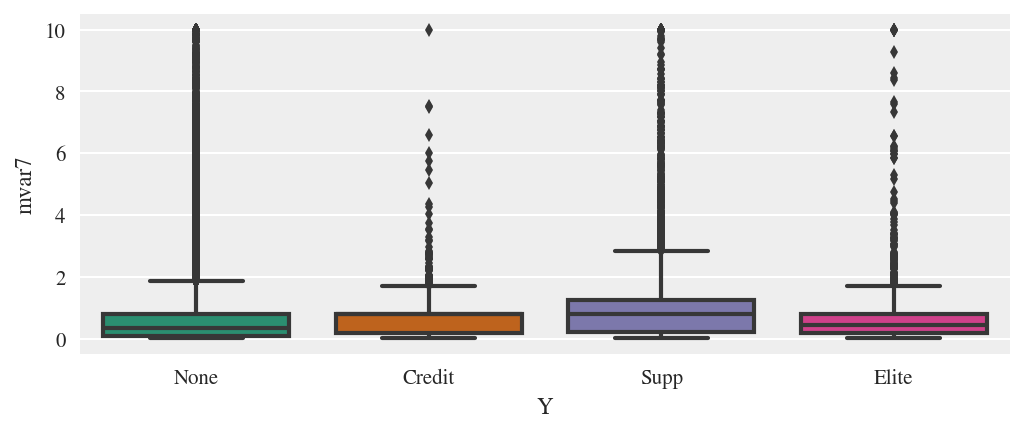

In [56]:
sns.boxplot(x="Y", y="mvar7", data=data)

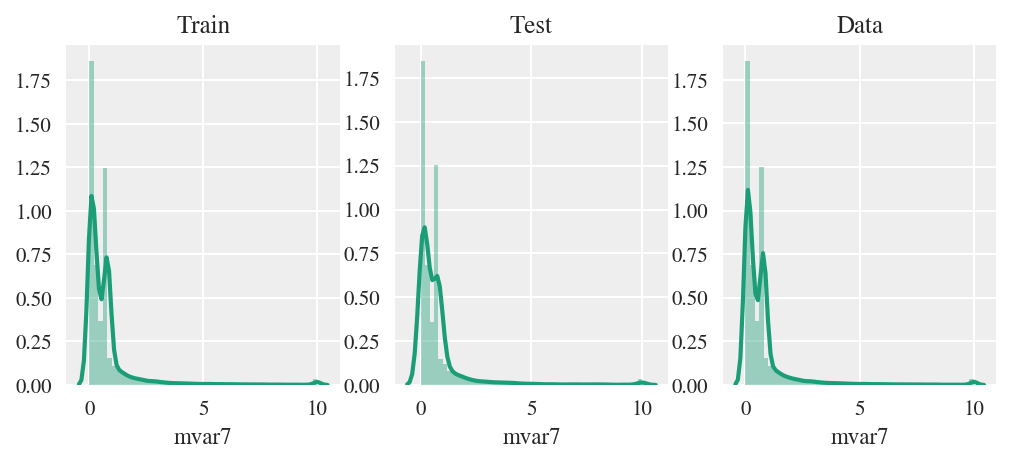

In [57]:
cont_plot("mvar7")

## mvar8 : Internal influencer score

In [58]:
data["mvar8"].nunique()

162

## mvar9 : Income

In [59]:
data["mvar9"].nunique()

16523

In [60]:
data[data.mvar9 == 0].shape

(1978, 48)

In [61]:
data["mvar9"].describe()

count    5.000000e+04
mean     1.997762e+06
std      3.844449e+06
min      0.000000e+00
25%      1.267680e+05
50%      7.362955e+05
75%      2.918974e+06
max      3.420702e+07
Name: mvar9, dtype: float64

In [62]:
# Replacing 0 with mean # See later
data["mvar9"][data.mvar9==0] = data["mvar9"][data.mvar9 >0].mean()
train["mvar9"][train.mvar9==0] = data["mvar9"][data.mvar9 >0].mean()
test["mvar9"][test.mvar9==0] = data["mvar9"][data.mvar9 >0].mean()

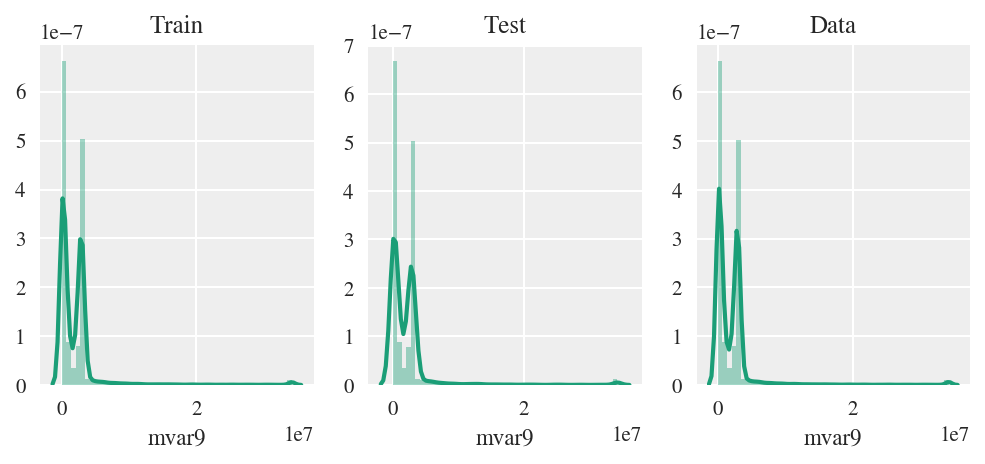

In [63]:
cont_plot("mvar9")

## mvar10 : Platinum card indicator

In [64]:
data["mvar10"].value_counts()

0    33450
1    16550
Name: mvar10, dtype: int64

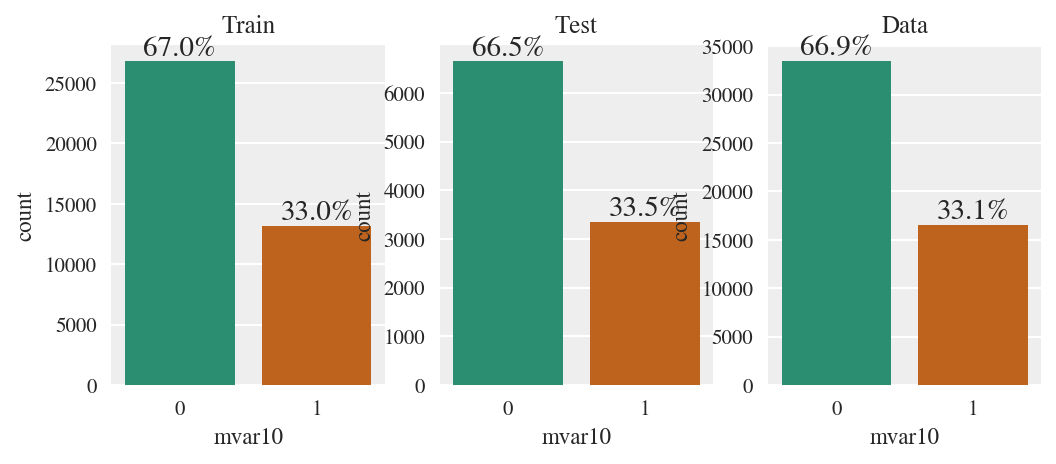

In [65]:
cate_plot("mvar10")

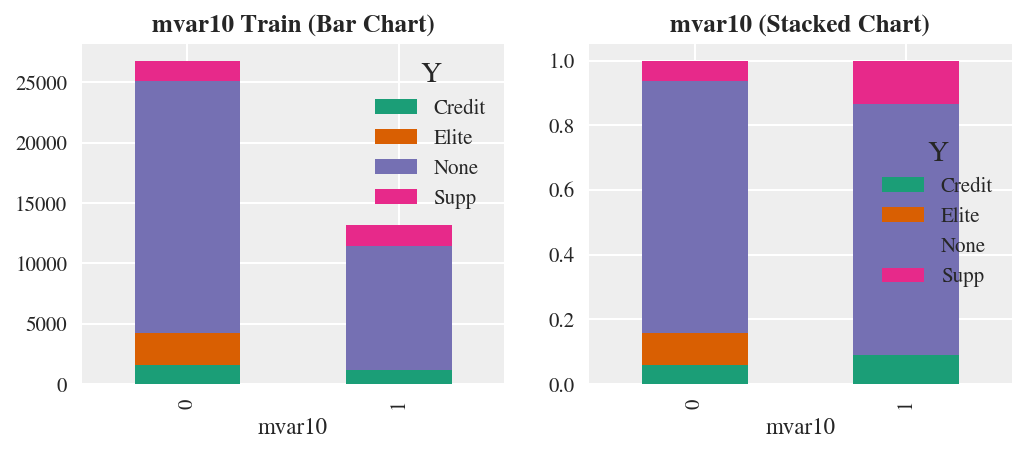

In [66]:
stacked_plot("mvar10")

In [174]:
data["Y"][data.mvar10==1].value_counts()

None      13597
Supp       1749
Credit     1202
Elite         2
Name: Y, dtype: int64

In [176]:
data["Y"][data.mvar10==0].value_counts()

None      27525
Elite      2652
Supp       1698
Credit     1575
Name: Y, dtype: int64

In [ ]:
# If platinum then no elite card

## mvar11 : Internal probability score for affinity towards busniess expenditure

In [182]:
data["mvar11"].nunique()

34289

## mvar12 : Industry code in which the customer has spent the most in past. (Including estimated external).

In [181]:
data.mvar12.nunique()

18

In [74]:
pd.crosstab(train["mvar12"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar12,,,,
Apparel,19,18,326,17
Automotive,34,37,404,45
Construction,221,245,2391,347
Consumables,96,100,929,87
Durable goods,87,102,1351,149
Entertainment,172,164,1816,225
Finance,214,180,2255,236
Household,150,164,1885,174
Manufacturing,78,113,1430,187


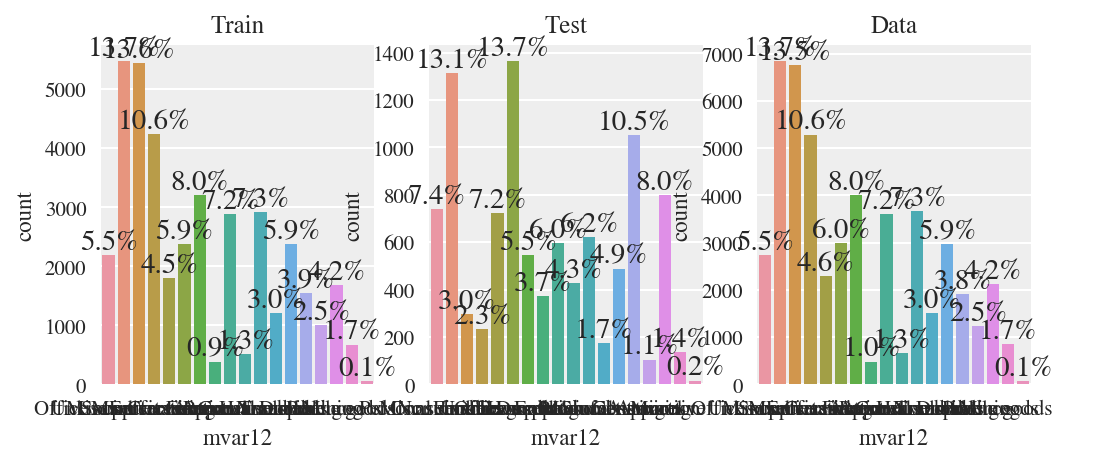

In [183]:
cate_plot("mvar12")

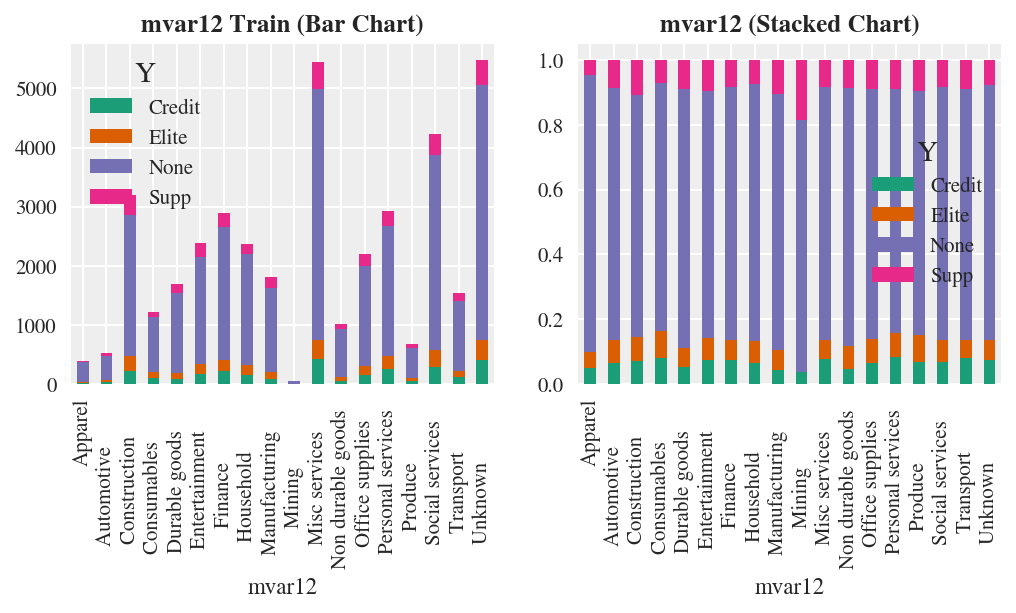

In [184]:
stacked_plot("mvar12")

## mvar13 : Number of times the customer has made payments against the card in the last 1 year

In [186]:
data["mvar13"].nunique()

23

In [76]:
pd.crosstab(train["mvar13"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar13,,,,
0,14,13,220,42
2,4,6,83,9
3,4,5,109,12
4,13,5,157,21
5,15,14,151,21
6,68,44,590,60
7,139,76,1216,134
8,216,163,2270,188
9,189,153,1976,171


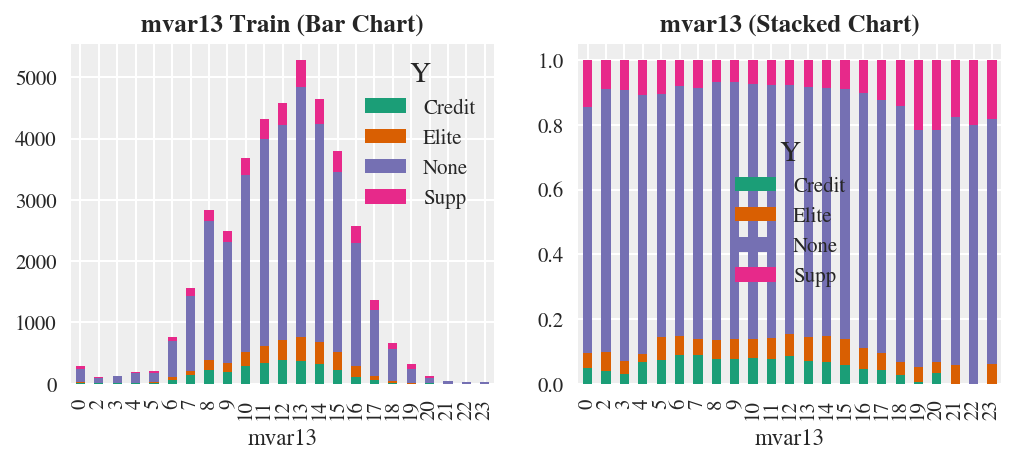

In [187]:
stacked_plot("mvar13")

## mvar14 : Number of club memberships

In [188]:
data["mvar14"].nunique()

10

In [190]:
data["mvar14"].value_counts()

1    48403
2      635
0      346
3      258
4      139
5       86
6       81
7       32
9       10
8       10
Name: mvar14, dtype: int64

In [77]:
pd.crosstab(train["mvar14"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar14,,,,
0,7,1,237,33
1,2681,2442,30258,3353
2,49,64,364,26
3,22,42,119,13
4,10,22,64,12
5,4,32,34,3
6,3,32,27,3
7,1,12,10,3
8,0,4,5,0


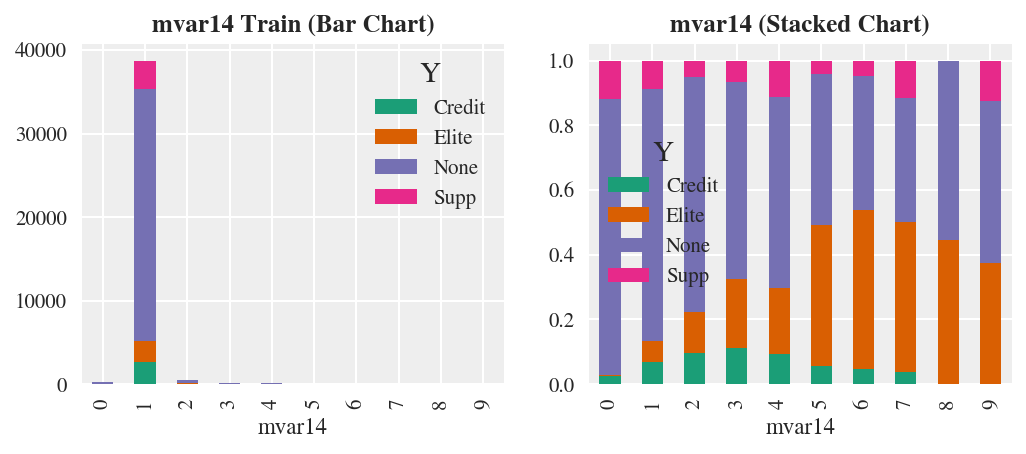

In [189]:
stacked_plot("mvar14")

## mvar15 : Number of air miles memberships

In [191]:
data["mvar15"].nunique()

6

In [194]:
data["mvar15"].value_counts()

0    39973
1     6020
2     1982
3     1585
4      427
5       13
Name: mvar15, dtype: int64

In [78]:
pd.crosstab(train["mvar15"], train["Y"])
# pd.crosstab(train["mvar2"], train["Y"]).apply(lambda r: r/r.sum(), axis=1)

Y,Credit,Elite,None,Supp
mvar15,,,,
0,2214,2193,24743,2849
1,335,265,3814,396
2,120,88,1281,95
3,87,79,1002,82
4,21,29,273,23
5,0,0,9,2


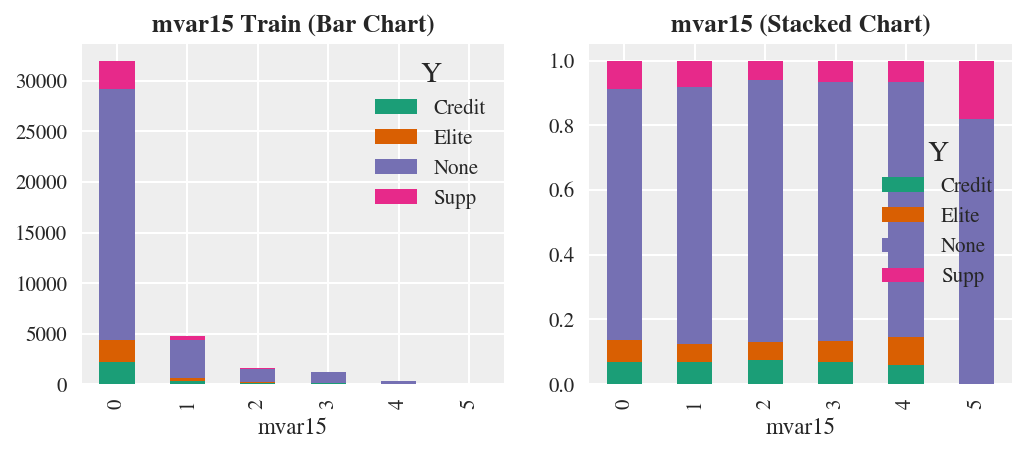

In [192]:
stacked_plot("mvar15")

## mvar36 : Total spend in quarter 1

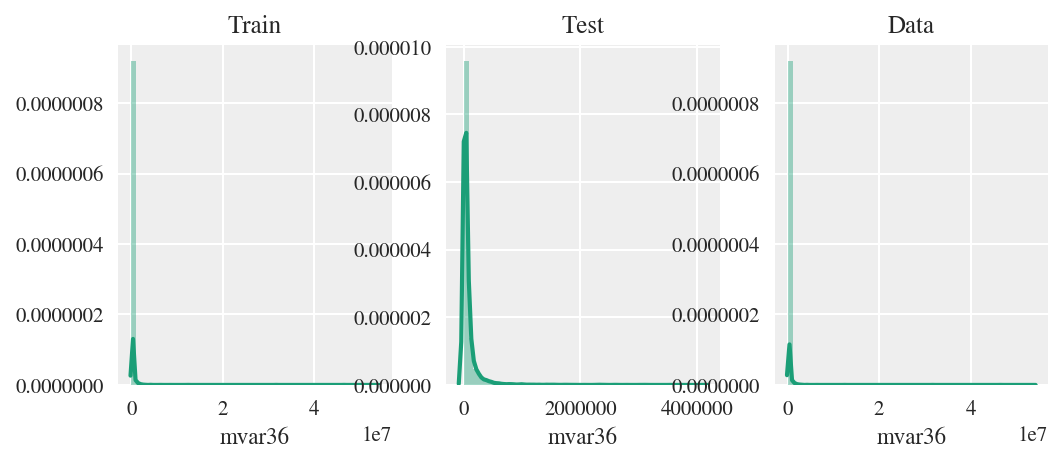

In [86]:
cont_plot("mvar36")

In [85]:
data["mvar36"].describe()

count    5.000000e+04
mean     7.865660e+04
std      4.107601e+05
min      0.000000e+00
25%      9.418685e+03
50%      2.558517e+04
75%      6.891617e+04
max      5.410426e+07
Name: mvar36, dtype: float64

In [87]:
from scipy.stats import boxcox

In [89]:
data['mvar36'] = data["mvar36"].apply(lambda x: x+1)

In [90]:
data["mvar36_2"], _ = boxcox(data["mvar36"])

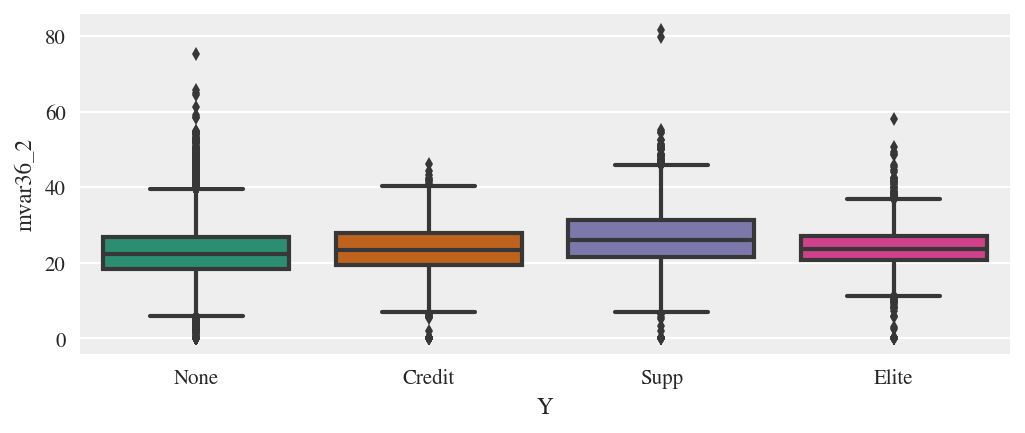

In [91]:
sns.boxplot(x="Y", y="mvar36_2", data=data)